## Overview

The `distributions` module offers a number of classes to deal with analytical and experimental (data) distributions commonly encountered in polymerization kinetics. 


| Class                     | Required arguments  | Optional arguments   |   Category   |
|---------------------------|:-------------------:|:--------------------:|:------------:|
| Flory                     |         DPn         |      M0, name        | analytical   |
| Poisson                   |         DPn         |      M0, name        | analytical   |
| LogNormal                 |      DPn, PDI       |      M0, name        | analytical   |
| SchulzZimm                |      DPn, PDI       |      M0, name        | analytical   |
| DataDistribution          | size_data, pdf_data |  kind, M0, name, ... | data         |

All analytical distributions have the number-average degree of polymerization (`DPn`) as first required positional argument. Additionally, the `LogNormal` and `SchulzZimm` distributions take the polydispersity index (`PDI`) as second required positional argument. In the case of `DataDistribution`, the required arguments are the measured/simulated values of the distribution curve. The average molar-mass of the repeating units (`M0`) and the distribution name (`name`) are optional keyword arguments.


## Analytical distributions

In [1]:
from polykin.distributions import Flory, Poisson, LogNormal, SchulzZimm

To instantiate an analytical distribution, we call the respective class constructor with the desired argument values. Here are some examples.

In [2]:
# Poisson distribution with DPn=100, and default M0=100 and name=''
p = Poisson(100)
# Flory with DPn=120, and user-defined M0 and name                                
f = Flory(120, M0=65, name='polymer-F')         
# Log-Normal with DPn=150, PDI=1.5, default M0 and user-defined name
g = LogNormal(150, 1.5, name='polymer-L')
# Schulz-Zimm with DPn=100, PDI=3, and user-defined M0 and name                      
s = SchulzZimm(100, 3, M0=80, name='polymer-Z') 

The most important properties of a distribution can be displayed with the `print()` command.

In [3]:
print(f)

type: Flory
name: polymer-F
DPn:  120.0
DPw:  239.0
DPz:  358.5
PDI:  1.99
M0:   65.0 g/mol
Mn:   7,800 g/mol
Mw:   15,535 g/mol
Mz:   23,302 g/mol


The independent properties of the distribution (i.e., the variables which are arguments of the respective class constructor) can be modified after instantiation, if desired.

In [4]:
f.DPn = 100
f.M0 = 84
f.name = 'polymer-Y'
print(f)

type: Flory
name: polymer-Y
DPn:  100.0
DPw:  199.0
DPz:  298.5
PDI:  1.99
M0:   84.0 g/mol
Mn:   8,400 g/mol
Mw:   16,716 g/mol
Mz:   25,074 g/mol


Any of these properties can be accessed by its name.

In [5]:
f.Mw/f.Mn # this should equal PDI

1.9899999999999995

## Probability values

Probability density function (pdf) as well as cumulative density function (cfd) values can be obtained for any chain-length by using the methods `pdf()` and `cdf()`, respectively.

In [6]:
# mass pdf for a single chain-length
f.pdf(120) 

0.003628853228028265

In [7]:
# mass pdf for a list/array of chain-lengths
f.pdf([110, 120, 130]) 

array([0.00367815, 0.00362885, 0.00355536])

In [8]:
# number pdf for a list/array of chain molar masses
p.pdf([9e3, 1e4, 1.1e4], kind='number', sizeasmass=True) #

array([0.00025043, 0.00040061, 0.00023418])

In [9]:
# mass cdf at the first 3 characteristic DP averages
f.cdf([f.DPn, f.DPw, f.DPz], kind='mass')

array([0.26793532, 0.59535432, 0.80159978])

The pdf and cdf values are, of course, internally consistent, as illustrated by the example below.

In [10]:
import numpy as np
x = np.arange(1, p.DPn)
pdf = p.pdf(x, kind='number')
cdf = p.cdf(x[-1], kind='number')
print('sum(pdf):', np.sum(pdf))
print('cdf:     ', cdf)

sum(pdf): 0.486634197669204
cdf:      0.4866341976692096


## Random samples

Random samples of chain-lengths - for use in stochastic simulations, etc. - can be generated using the method `random()`.

In [11]:
p.random() # single value

96

In [12]:
p.random(5) # vector of length 5

array([104,  88,  91, 106, 106], dtype=int64)

In [13]:
g.random((3,4)) # array of shape (3,4)

array([[ 59., 123., 177.,  64.],
       [118., 136., 163.,  72.],
       [133.,  48.,  92., 288.]])

The random values are, of course, consistent with the distribution properties, as illustrated below for DPw.

In [14]:
x = f.random(10**5)
DPw_random = np.sum(x**2)/np.sum(x)
print("DPw random:", DPw_random)
print("DPw 'true':", f.DPw)

DPw random: 199.7727852271378
DPw 'true': 198.9999999999998


## Plots

The method `plot()` allows for a quick visualization of the corresponding _number_, _mass_ or _GPC_ probability density function (pdf) or cumulative density function (cdf). If no arguments are specified, the mass pdf is displayed.

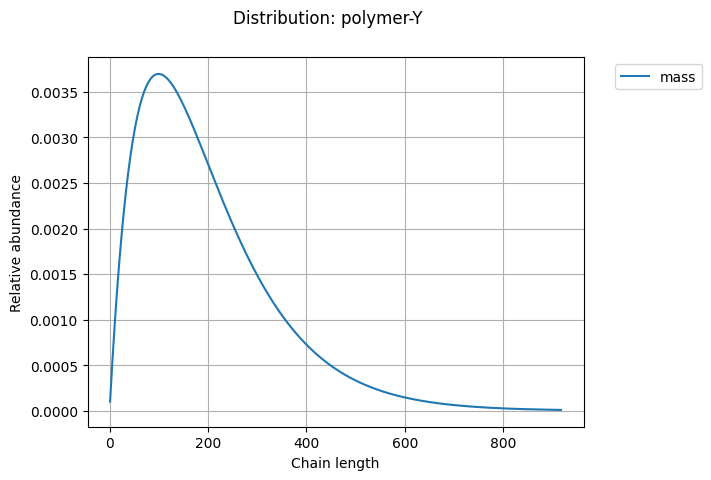

In [15]:
f.plot() # same as f.plot('mass')

Many other types of plots can be generated. For example, we can draw a plot overlaying the number and mass pdf, with an x-axis based on molar mass rather than chain-length.

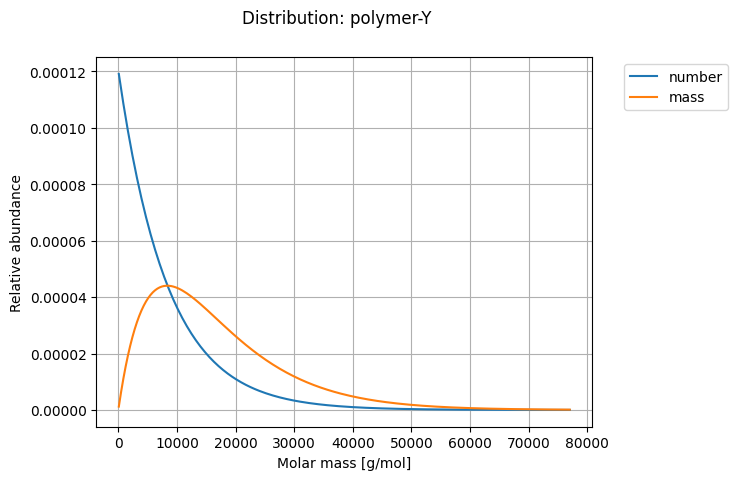

In [16]:
f.plot(['number','mass'], sizeasmass=True)

If we select a GPC-type plot, the x-axis scale is automatically switched to 'log'.  

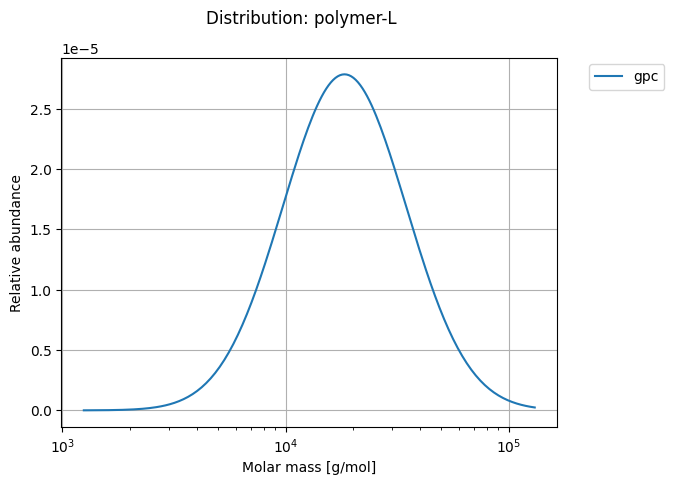

In [17]:
g.plot('gpc', sizeasmass=True)

The `plot()` method tries to automatically adjust the range of the x-axis. The built-in algorithm works rather well for `kind=number` and `kind=mass`, but less so for `kind=gpc`. Whenever required, the range can be adjusted with the keyword argument `xrange=(xmin, xmax)`.  

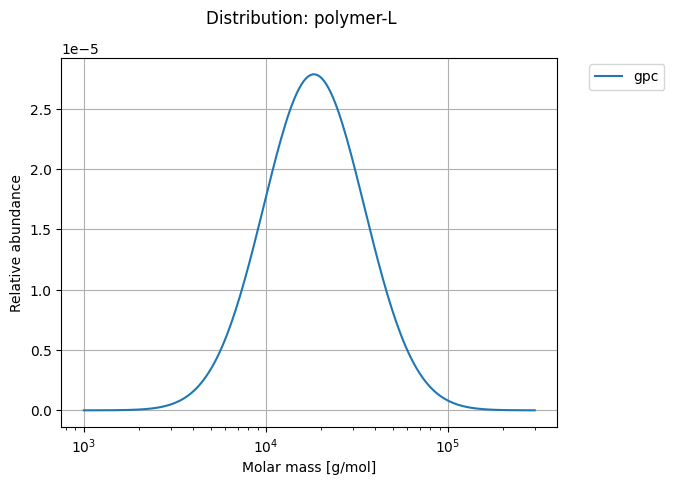

In [18]:
g.plot('gpc', sizeasmass=True, xrange=(1e3, 3e5))

The cdf can also be displayed by setting the corresponding keyword `cdf` to the desired y-axis. If `cdf=1`, the cdf is displayed on the primary axis (replacing the pdf). If `cdf=2`, the cdf is displayed on the secondary axis, while the pdf remains on the primary axis.

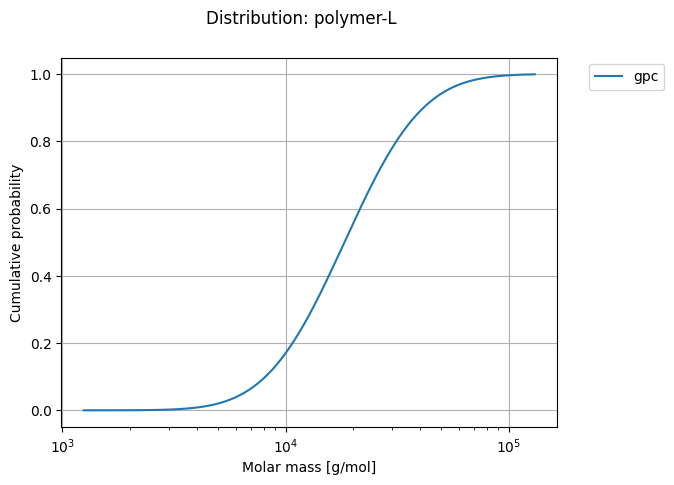

In [19]:
g.plot('gpc', sizeasmass=True, cdf=1) # cdf on primary y-axis (replaces pdf)

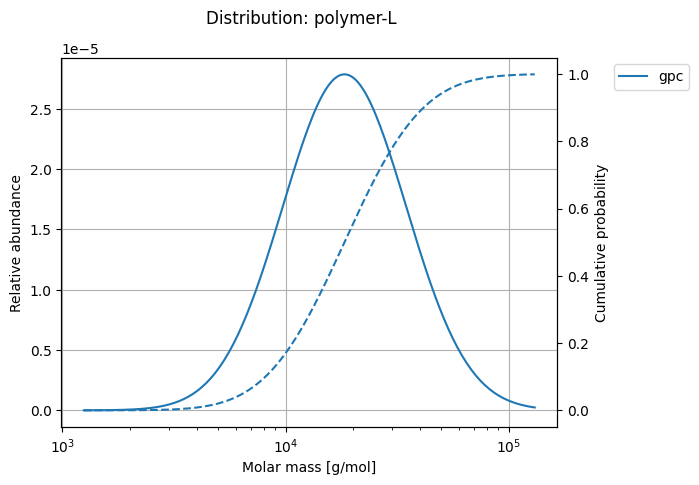

In [20]:
g.plot('gpc', sizeasmass=True, cdf=2) # cdf on secondary y-axis

Once a plot is created, the corresponding `matplotlib.figure.Figure` object is stored in the instance attribute `fig`. Thus, we can use all the methods of the figure object; for instance, we can use the `savefig()` method to save the plot.

In [21]:
g.fig.savefig(g.name, bbox_inches='tight') # save the plot to `polymer-L.png`

Lastly, the function `plotdists()` can be used to overlay multiple distributions on the same plot. The optional keywords arguments are those of the `plot()` method. 

In [22]:
from polykin.distributions import plotdists

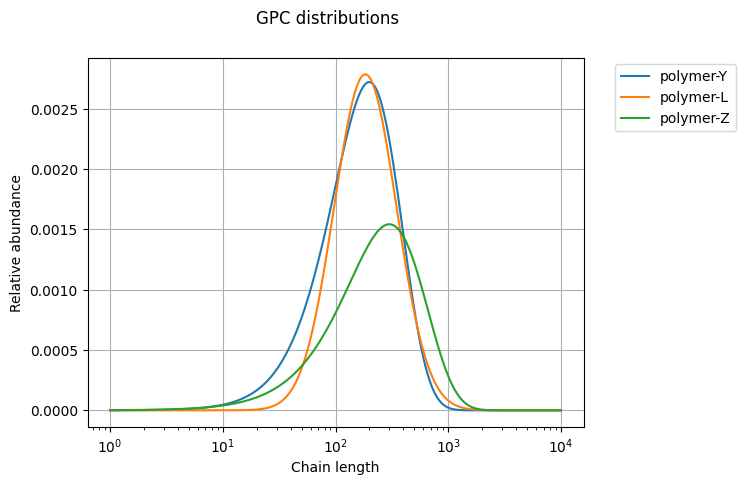

In [23]:
_ = plotdists([f, g, s], kind='gpc', xrange=(1, 1e4))

## Mixture distributions

Any of the abovementioned _individual_ distributions can be combined in any proportion to obtain a resulting [mixture distribution](https://en.wikipedia.org/wiki/Mixture_distribution). This feature can be used, for instance, to compute the distribution of a polymer blend, as illustrated below.

First, let's define some sample polymer distributions.

In [24]:
a = Poisson(10, name="A")
b = Flory(50, name="B")
c = LogNormal(1000, 2, name="C")
d = SchulzZimm(10**4, 2, name="D")

Now, we define the blend using common algebra language. The (positive) numerical factors are the _mass_ parts used to prepare the blend.

In [25]:
blend = 0.5*a + 1*b + 0.5*c + 0.2*d

As illustrated above, we can use the `print()` command to display the key values of the distribution and of its components.

In [26]:
print(blend)

type: MixtureDistribution
name: A+B+C+D
DPn:  31.2
DPw:  2320.2
DPz:  24295.4
PDI:  74.37
M0:   100.0 g/mol
Mn:   3,120 g/mol
Mw:   232,020 g/mol
Mz:   2,429,542 g/mol


In [27]:
print(blend.components_table)

 #   Weight   Distribution        DPn        DPw    PDI
-------------------------------------------------------
 1    0.500        Poisson   1.00e+01   1.09e+01   1.09
 2    1.000          Flory   5.00e+01   9.90e+01   1.98
 3    0.500      LogNormal   1.00e+03   2.00e+03   2.00
 4    0.200     SchulzZimm   1.00e+04   2.00e+04   2.00


And the built-in `plot()` method is also available for mixtures. 

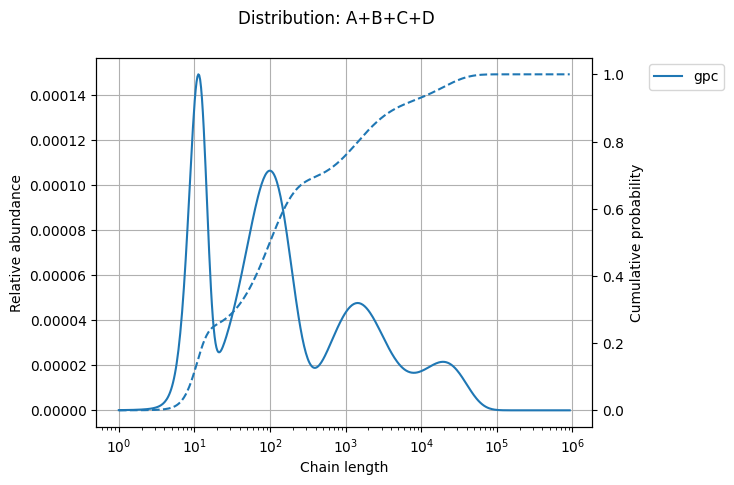

In [28]:
blend.plot('gpc', cdf=2)

## Data distributions

In [29]:
from polykin.distributions import DataDistribution

Data distributions are constructed from numerical values of the distribution curve. A typical example, would be a molar mass distribution curve determined by [size-exclusion chromatography (SEC)](https://en.wikipedia.org/wiki/Size-exclusion_chromatography).
Since we do not have experimental data at hand, we'll use computed data extracted from the blend distribution.

In [30]:
import numpy as np
size_data = np.logspace(0, 5.5, 200)
pdf_data = blend.pdf(size_data, 'gpc')

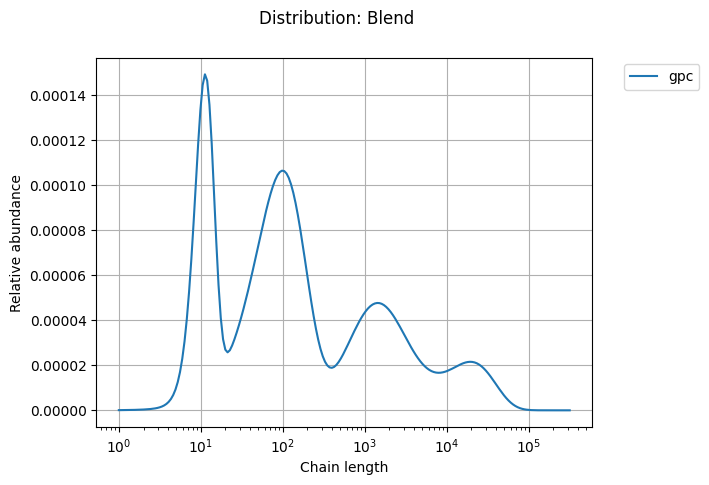

In [31]:
dist_data = DataDistribution(size_data, pdf_data, kind='gpc', name='Blend')
dist_data.plot('gpc')

Most of the methods illustrated above for analytical and mixture distributions are also available for `DataDistribution`(s). 

A data distribution can be numerically "deconvoluted" to find the combination of weights and individual distributions which best describe it using the method `fit()`. For example, let's try deconvoluting the above distribution as a combination of 4 distributions of type `SchulzZimm`.

In [32]:
dist_deconvoluted = dist_data.fit(SchulzZimm, 4)

 #   Weight   Distribution        DPn        DPw    PDI
-------------------------------------------------------
 1    0.232     SchulzZimm   1.01e+01   1.10e+01   1.09
 2    0.433     SchulzZimm   5.10e+01   9.67e+01   1.90
 3    0.220     SchulzZimm   5.57e+02   1.52e+03   2.73
 4    0.115     SchulzZimm   4.38e+03   1.70e+04   3.87


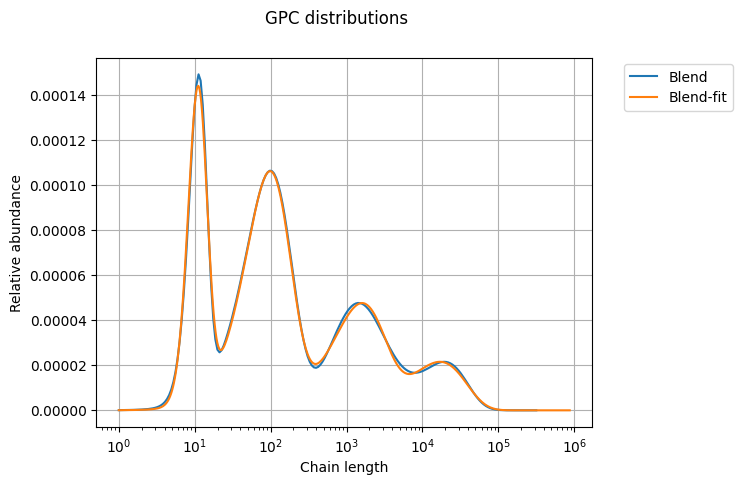

In [33]:
_ = plotdists([dist_data, dist_deconvoluted], 'gpc')

The fit is quite good! Can you guess why?